In [6]:

!pip install IPython.display

ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##import library


In [22]:
import os
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#display img
from IPython.display import display, Image
#ignore warning
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures



##preprocessing data

In [14]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Humidity_Temp_Prediction.csv', delimiter=';')
display(data.head())
display(data.shape)
display(data.info())


,id,temp,humidity,date_time
0,9197,21,20,2016-08-17 00:00:01
1,9198,21,20,2016-08-17 00:01:01
2,9199,21,20,2016-08-17 00:02:01
3,9200,21,20,2016-08-17 00:03:01
4,9201,21,20,2016-08-17 00:04:01


(619999, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619999 entries, 0 to 619998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         619999 non-null  int64 
 1   temp       619999 non-null  int64 
 2   humidity   619999 non-null  int64 
 3   date_time  619999 non-null  object
dtypes: int64(3), object(1)
memory usage: 18.9+ MB


None

In [15]:
# Convert date_time to datetime format
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619999 entries, 0 to 619998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         619999 non-null  int64         
 1   temp       619999 non-null  int64         
 2   humidity   619999 non-null  int64         
 3   date_time  619999 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 18.9 MB


In [18]:
# Preprocess the data

data['Hour'] = data['date_time'].dt.hour
data['Minute'] = data['date_time'].dt.minute
data['DayofWeek'] = data['date_time'].dt.day_name()
data['Month'] = data['date_time'].dt.month
data['Minute'] = data['Minute'] + (data['Hour'] * 60 )
# data.drop('id', axis=1, inplace=True)

NumDescripticeStats = data.describe(include = [np.number])
CatDescripticeStats = data.describe(include =[np.number])
display(NumDescripticeStats)
display(CatDescripticeStats)
# # Extract hour and minute from date_time
# data['hour'] = data['date_time'].dt.hour
# data['minute'] = data['date_time'].dt.minute

# # Drop the id column (if not needed)
# data.drop('id', axis=1, inplace=True)

# # Separate features and target variable
# X = data[['hour', 'minute']]
# y = data['humidity']

,id,temp,humidity,Hour,Minute,Month
count,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000
mean,319196.000000,19.365405,41.340391,11.436893,715.723067,7.460789
std,178978.439111,1.523185,32.418998,6.946960,417.192832,3.360717
min,9197.000000,15.000000,16.000000,0.000000,0.000000,1.000000
25%,164196.500000,18.000000,20.000000,5.000000,354.000000,5.000000
50%,319196.000000,19.000000,21.000000,11.000000,711.000000,8.000000
75%,474195.500000,20.000000,95.000000,17.000000,1079.000000,10.000000
max,629195.000000,28.000000,95.000000,23.000000,1439.000000,12.000000


,id,temp,humidity,Hour,Minute,Month
count,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000
mean,319196.000000,19.365405,41.340391,11.436893,715.723067,7.460789
std,178978.439111,1.523185,32.418998,6.946960,417.192832,3.360717
min,9197.000000,15.000000,16.000000,0.000000,0.000000,1.000000
25%,164196.500000,18.000000,20.000000,5.000000,354.000000,5.000000
50%,319196.000000,19.000000,21.000000,11.000000,711.000000,8.000000
75%,474195.500000,20.000000,95.000000,17.000000,1079.000000,10.000000
max,629195.000000,28.000000,95.000000,23.000000,1439.000000,12.000000


##data exploration

,Hour,temp
0,0,19.118611
1,1,19.083789
2,2,19.074765
3,3,19.102233
4,4,19.135009
5,5,19.143692
6,6,19.167604
7,7,19.286310
8,8,19.410452
9,9,19.469362


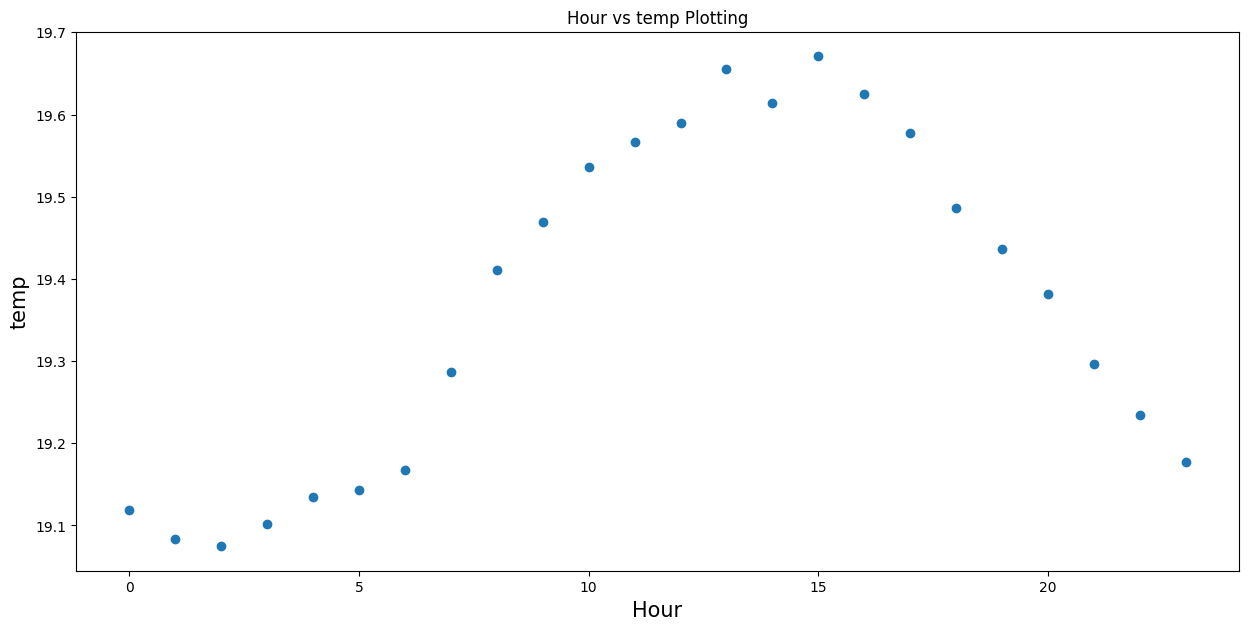

In [20]:
feature_x ='Hour'
feature_y= 'temp'
GroupBYDF = data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index = False).mean()
display(GroupBYDF)
plt.figure(figsize = (15,7))
plt.scatter(GroupBYDF[feature_x], GroupBYDF[feature_y])
plt.title(f'{feature_x} vs {feature_y} Plotting')
plt.xlabel(feature_x,size=15)
plt.ylabel(feature_y, size=15)
plt.savefig(f'{feature_x}vs {feature_y} Plotting.jpg')
plt.show()

,Minute,temp
0,0,19.161731
1,1,19.153318
2,2,19.169683
3,3,19.152273
4,4,19.141230
...,...,...
1435,1435,19.178490
1436,1436,19.155606
1437,1437,19.157895
1438,1438,19.132118


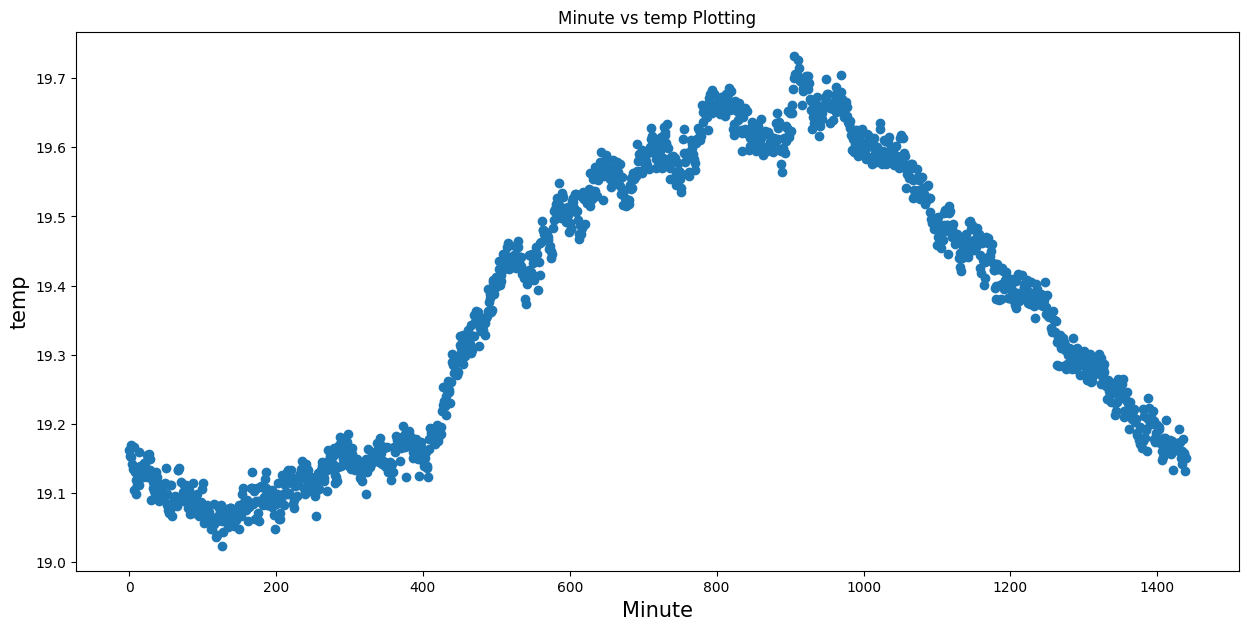

In [21]:
feature_x ='Minute'
feature_y= 'temp'
GroupBYDF = data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index = False).mean()
display(GroupBYDF)
plt.figure(figsize = (15,7))
plt.scatter(GroupBYDF[feature_x], GroupBYDF[feature_y])
plt.title(f'{feature_x} vs {feature_y} Plotting')
plt.xlabel(feature_x,size=15)
plt.ylabel(feature_y, size=15)
plt.savefig(f'{feature_x}vs {feature_y} Plotting.jpg')
plt.show()

In [42]:
feature_x ="Minute"
feature_y="temp"
DataX= data.loc[:,[feature_x,feature_y]].groupby(feature_x, as_index=False).mean()
display(DataX.head())
m1=DataX[[feature_x]].values
m2=DataX[feature_y].values
print(m1)
print(m2)

,Minute,temp
0,0,19.161731
1,1,19.153318
2,2,19.169683
3,3,19.152273
4,4,19.141230


[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
[19.16173121 19.15331808 19.16968326 ... 19.15789474 19.13211845
 19.15068493]


In [43]:
#Polynomial model
# Xm1 = data[[ 'Minute']]
poly_reg = PolynomialFeatures(degree =4)
X_poly = poly_reg.fit_transform(m1)
print(X_poly[:5])

[[  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


In [44]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, m2)

LinearRegression()

In [45]:
m2_predict = lin_reg.predict(poly_reg.fit_transform(m1))

In [46]:
m2_predict

array([19.19123175, 19.18928943, 19.1873632 , ..., 19.14239875,
       19.14153535, 19.14067664])

In [47]:
m2

array([19.16173121, 19.15331808, 19.16968326, ..., 19.15789474,
       19.13211845, 19.15068493])

In [48]:
residulas = m2 - m2_predict
std = np.std(residulas)
m2_predict_up = m2_predict + 3*std
m2_predict_down = m2_predict - 3*std


,Minute,temp
0,0,19.161731
1,1,19.153318
2,2,19.169683
3,3,19.152273
4,4,19.141230
...,...,...
1435,1435,19.178490
1436,1436,19.155606
1437,1437,19.157895
1438,1438,19.132118


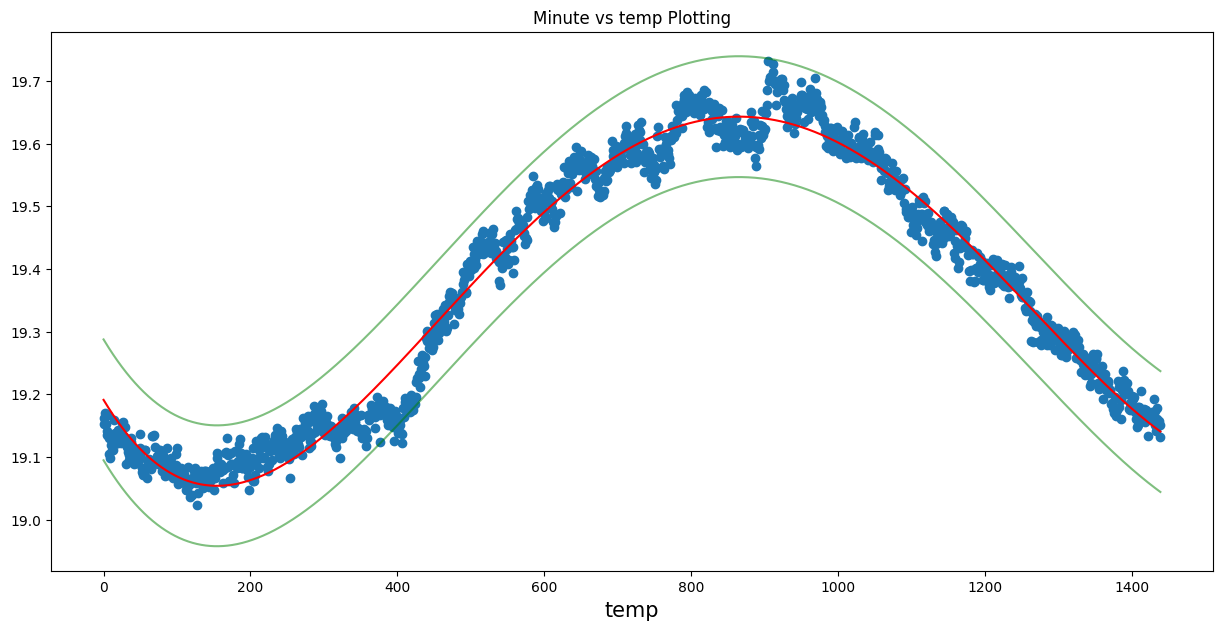

In [49]:
feature_x = 'Minute'
feature_y = 'temp'
GroupBYDF = data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index = False).mean()
display(GroupBYDF)
plt.figure(figsize = (15,7))
plt.scatter(GroupBYDF[feature_x], GroupBYDF[feature_y])
plt.plot(m1,m2_predict,color= 'red')
plt.plot(m1,m2_predict_up, color = "green", alpha=0.5)
plt.plot(m1,m2_predict_down, color = "green", alpha=0.5)
plt.title(f'{feature_x} vs {feature_y} Plotting')
plt.xlabel(feature_y, size=15)
plt.savefig(f'{feature_x}vs {feature_y} Plotting.jpg')
plt.show()

##Training

##Evaluation

Mean Squared Error: 1050.98
R-squared: 0.00


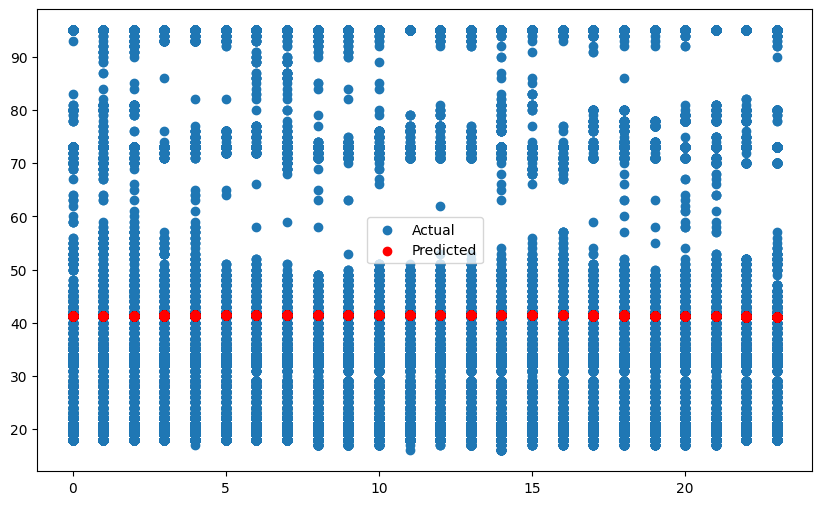

In [11]:
# from sklearn.metrics import mean_squared_error, r2_score

# # Make predictions
# y_pred = model.predict(X)

# # Calculate evaluation metrics
# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)

# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R-squared: {r2:.2f}')

# # Visualize the predictions
# plt.figure(figsize=(10, 6))
# plt.scatter(X['hour'], y, label='Actual')
# plt.scatter(X['hour'], y_pred, label='Predicted', color='r')
# plt.legend()
# plt.show()

   temp  humidity           date_time  Hour  Minute  DayofWeek  Month
0    21        20 2016-08-17 00:00:01     0       0  Wednesday      8
1    21        20 2016-08-17 00:01:01     0       1  Wednesday      8
2    21        20 2016-08-17 00:02:01     0       2  Wednesday      8
3    21        20 2016-08-17 00:03:01     0       3  Wednesday      8
4    21        20 2016-08-17 00:04:01     0       4  Wednesday      8
temp         0
humidity     0
date_time    0
Hour         0
Minute       0
DayofWeek    0
Month        0
dtype: int64


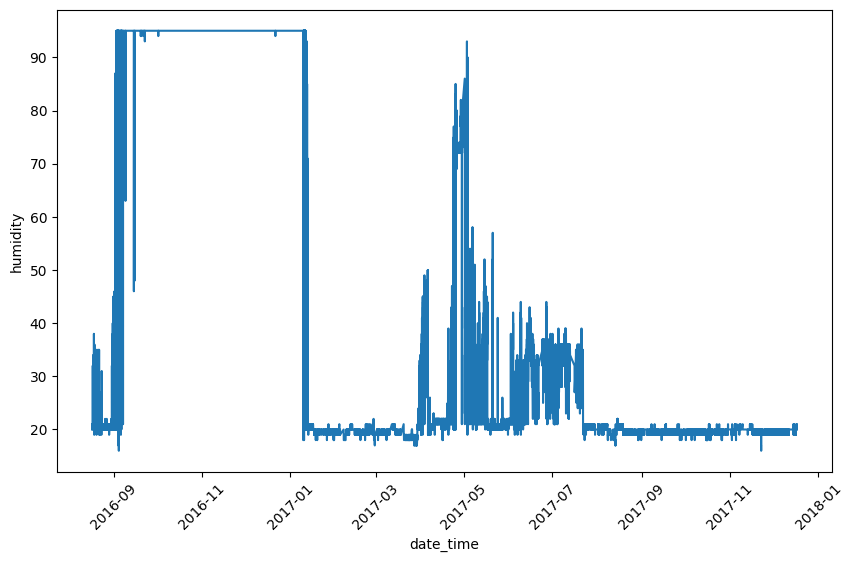

ValueError: could not convert string to float: 'Wednesday'

In [12]:
# import os
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from IPython.display import display, Image
# import warnings
# warnings.filterwarnings("ignore")

# # Load the data
# data = pd.read_csv('/content/drive/MyDrive/Humidity_Temp_Prediction.csv', delimiter=';')

# # Preprocess the data
# data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')
# data['Hour'] = data['date_time'].dt.hour
# data['Minute'] = data['date_time'].dt.minute
# data['DayofWeek'] = data['date_time'].dt.day_name()
# data['Month'] = data['date_time'].dt.month
# data['Minute'] = (data['Hour'] * 60 + data['Minute']) % (24 * 60)
# data.drop('id', axis=1, inplace=True)

# # Data exploration
# print(data.head())
# print(data.isnull().sum())

# # Visualize the humidity
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='date_time', y='humidity', data=data)
# plt.xticks(rotation=45)
# plt.show()

# # Separate features and target variable
# X = data[['Hour', 'Minute', 'DayofWeek', 'Month']]
# y = data['humidity']

# # Training the Model
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline

# degree = 2  # Degree of the polynomial
# poly_features = PolynomialFeatures(degree=degree, include_bias=False)
# model = Pipeline([('poly_features', poly_features),
#                   ('linear_regression', LinearRegression())])

# model.fit(X, y)

# # Evaluation
# from sklearn.metrics import mean_squared_error, r2_score

# y_pred = model.predict(X)
# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)

# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R-squared: {r2:.2f}')

# # Visualize the predictions
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Minute'], y, label='Actual')
# plt.scatter(X['Minute'], y_pred, label='Predicted', color='r')
# plt.legend()
# plt.show()